In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000328_08_03_180.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000223_09_02_146.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000229_03_04_202.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_01_01_104.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000103_12_01_075.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000143_04_02_153.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/002276_05_03_078.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000020_03_01_166.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000054_03_01_025.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_04_01_242.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_170.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000058_07_01_195.png
/kaggle/input/iqothnccd-lung-cancer-dataset/Test cases/000230_03_02_166.png
/kaggle/inpu

In [3]:
import imageio.v2 as imageio

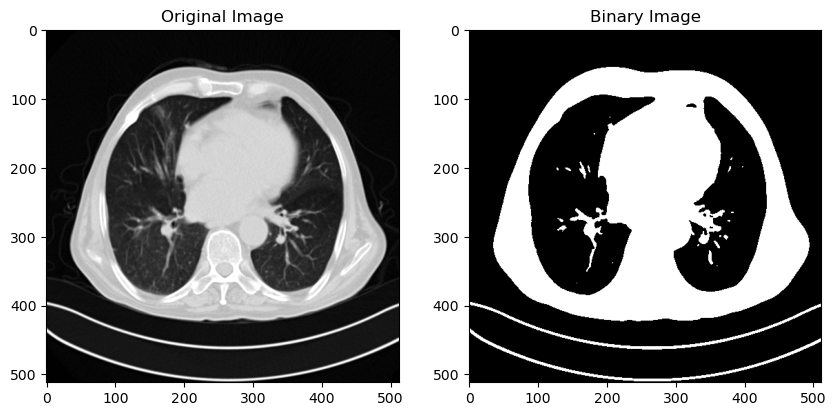

In [4]:
import cv2
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (15).jpg', 0)  # Read as grayscale

# Apply Otsu's thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the original and binary images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.show()

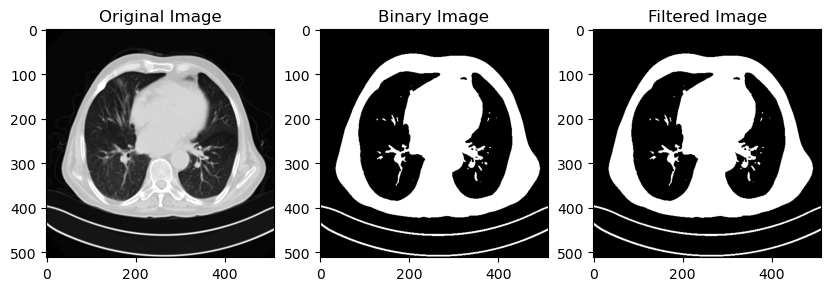

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (15).jpg', 0)  # Read as grayscale

# Apply Otsu's thresholding
_, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a filtered mask based on contour area
filtered_mask = np.zeros_like(binary_image)
min_area = 900000  # Minimum area threshold
for contour in contours:
    area = cv2.contourArea(contour)
    if area < min_area:
        cv2.drawContours(filtered_mask, [contour], 0, 255, -1)

# Apply the filtered mask to extract the tumor region
filtered_image = cv2.bitwise_and(binary_image, filtered_mask)

# Display the original, binary, and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.show()

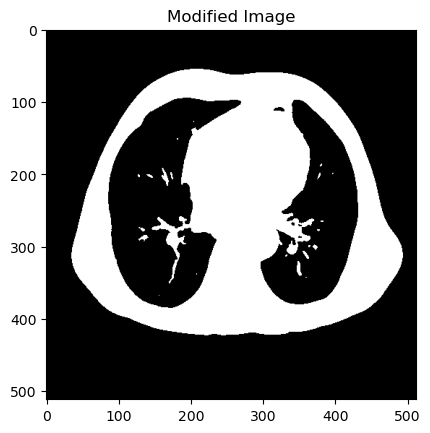

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the binary image
#binary_image = cv2.imread('your_binary_image.jpg', 0)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the contour with the largest area
largest_contour = max(contours, key=cv2.contourArea)

# Create a black mask with the same shape as the binary image
mask = np.zeros_like(binary_image)

# Draw the largest contour on the mask
cv2.drawContours(mask, [largest_contour], 0, 255, -1)

# Fill the largest contour with white color
cv2.drawContours(mask, [largest_contour], 0, 255, cv2.FILLED)

# Apply bitwise AND operation between the binary image and the mask
result = cv2.bitwise_and(binary_image, mask)

# Display the result
plt.imshow(result, cmap='gray')
plt.title('Modified Image')
plt.show()

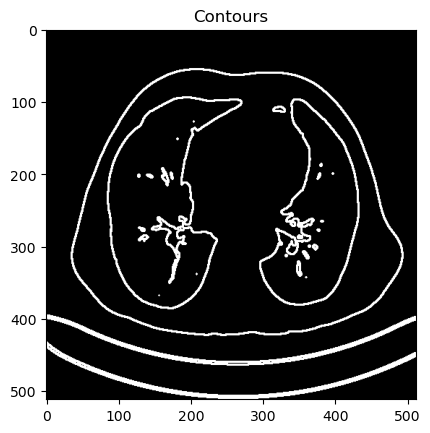

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the binary image
#binary_image = cv2.imread('your_binary_image.jpg', 0)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a black image to draw contours on
contour_image = np.zeros_like(binary_image)

# Draw all contours on the contour image
cv2.drawContours(contour_image, contours, -1, 255, 2)

# Display the contour image
plt.imshow(contour_image, cmap='gray')
plt.title('Contours')
plt.show()

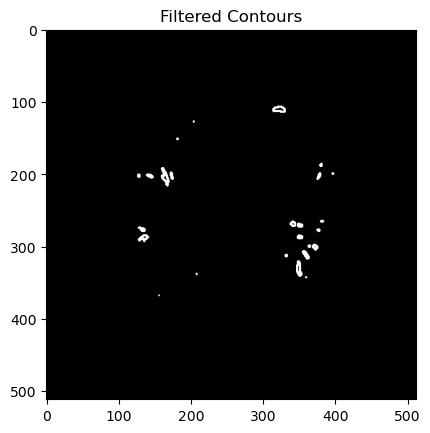

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the binary image
#binary_image = cv2.imread('your_binary_image.jpg', 0)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a black image to draw contours on
contour_image = np.zeros_like(binary_image)

# Set the area threshold
area_threshold = 1000  # Adjust the threshold as needed

# Filter contours based on area
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) < area_threshold]

# Draw filtered contours on the contour image
cv2.drawContours(contour_image, filtered_contours, -1, 255, 2)

# Display the contour image
plt.imshow(contour_image, cmap='gray')
plt.title('Filtered Contours')
plt.show()

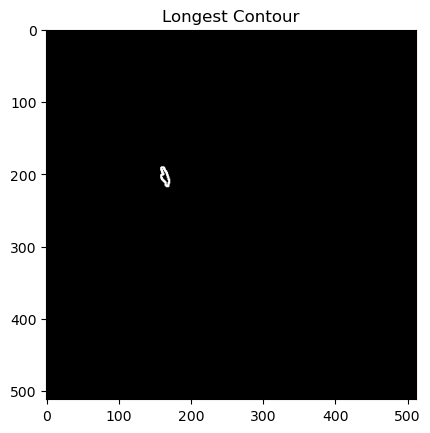

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the 'contour_image' created

# Find contours in the 'contour_image'
contours, _ = cv2.findContours(contour_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to track the longest diameter and its corresponding contour
max_diameter = 0
longest_contour = None

# Iterate through the detected contours
for contour in contours:
    # Calculate the minimum enclosing circle for the contour
    (x, y), radius = cv2.minEnclosingCircle(contour)

    # Diameter is twice the radius
    diameter = 2 * radius

    # Check if this contour has a longer diameter
    if diameter > max_diameter:
        max_diameter = diameter
        longest_contour = contour

# Display the contour with the longest diameter
if longest_contour is not None:
    # Create a black image to draw the longest contour
    longest_contour_image = np.zeros_like(contour_image)
    cv2.drawContours(longest_contour_image, [longest_contour], -1, 255, 2)

    # Display the longest contour
    plt.imshow(longest_contour_image, cmap='gray')
    plt.title('Longest Contour')
    plt.show()
else:
    print("No contour with a diameter found")


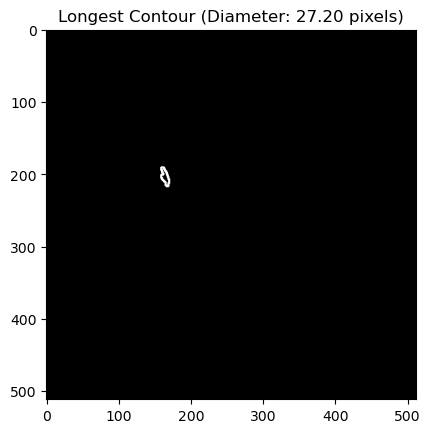

Diameter of the longest contour: 27.20 pixels


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the 'contour_image' created

# Find contours in the 'contour_image'
contours, _ = cv2.findContours(contour_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to track the longest diameter and its corresponding contour
max_diameter = 0
longest_contour = None

# Iterate through the detected contours
for contour in contours:
    # Calculate the maximum enclosing circle for the contour
    (x, y), radius = cv2.minEnclosingCircle(contour)

    # Diameter is twice the radius
    diameter = 2 * radius

    # Check if this contour has a longer diameter
    if diameter > max_diameter:
        max_diameter = diameter
        longest_contour = contour

# Display the contour with the longest diameter
if longest_contour is not None:
    # Create a black image to draw the longest contour
    longest_contour_image = np.zeros_like(contour_image)
    cv2.drawContours(longest_contour_image, [longest_contour], -1, 255, 2)

    # Display the longest contour
    plt.imshow(longest_contour_image, cmap='gray')
    plt.title(f'Longest Contour (Diameter: {max_diameter:.2f} pixels)')
    plt.show()

    # Print the diameter
    print(f"Diameter of the longest contour: {max_diameter:.2f} pixels")
else:
    print("No contour with a diameter found")


In [11]:
# Length in pixels and DPI value

dpi = 25  # DPI (dots per inch)

# Convert length to centimeters
length_in_cm = (max_diameter / dpi) * 2.54

# Print the result
print(f"{length_in_cm} pixels is approximately {length_in_cm:.2f} cm at {dpi} DPI.")


2.76383924407959 pixels is approximately 2.76 cm at 25 DPI.


In [12]:
def categorize_stage(tumor_size):
    if tumor_size < 3:
        return 'Stage 1'
    elif 3 <= tumor_size <= 7:
        return 'Stage 2'
    else:
        return 'Stage 3'

# Apply the categorization function to create a new column 'tumor_stage'
print(categorize_stage(length_in_cm))

Stage 1


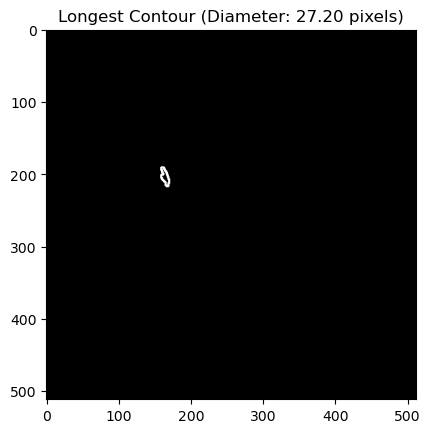

Diameter of the longest contour: 27.20 pixels
2.76383924407959 pixels is approximately 2.76 cm at 25 DPI.
Tumor Stage: Stage 1


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the 'contour_image' created

# Find contours in the 'contour_image'
contours, _ = cv2.findContours(contour_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to track the longest diameter and its corresponding contour
max_diameter = 0
longest_contour = None

# Iterate through the detected contours
for contour in contours:
    # Calculate the maximum enclosing circle for the contour
    (x, y), radius = cv2.minEnclosingCircle(contour)

    # Diameter is twice the radius
    diameter = 2 * radius

    # Check if this contour has a longer diameter
    if diameter > max_diameter:
        max_diameter = diameter
        longest_contour = contour

# Display the contour with the longest diameter
if longest_contour is not None:
    # Create a black image to draw the longest contour
    longest_contour_image = np.zeros_like(contour_image)
    cv2.drawContours(longest_contour_image, [longest_contour], -1, 255, 2)

    # Display the longest contour
    plt.imshow(longest_contour_image, cmap='gray')
    plt.title(f'Longest Contour (Diameter: {max_diameter:.2f} pixels)')
    plt.show()

    # Print the diameter
    print(f"Diameter of the longest contour: {max_diameter:.2f} pixels")

    # Length in pixels and DPI value
    dpi = 25  # DPI (dots per inch)

    # Convert length to centimeters
    length_in_cm = (max_diameter / dpi) * 2.54

    # Print the result
    print(f"{length_in_cm} pixels is approximately {length_in_cm:.2f} cm at {dpi} DPI.")

    # Categorize tumor stage based on length
    def categorize_stage(tumor_size):
        if tumor_size < 3:
            return 'Stage 1'
        elif 3 <= tumor_size <= 7:
            return 'Stage 2'
        else:
            return 'Stage 3'

    # Apply the categorization function to create a new column 'tumor_stage'
    tumor_stage = categorize_stage(length_in_cm)
    print(f"Tumor Stage: {tumor_stage}")

else:
    print("No contour with a diameter found")


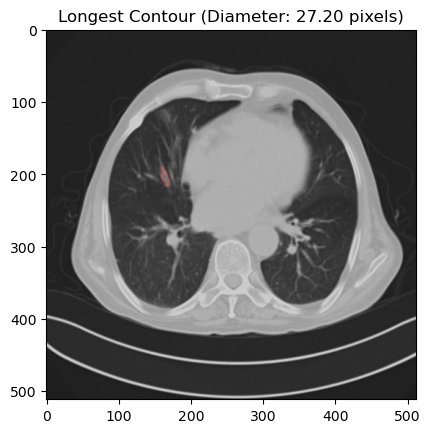

Diameter of the longest contour: 27.20 pixels
2.76383924407959 pixels is approximately 2.76 cm at 25 DPI.
Tumor Stage: Stage 1


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

lung_image_path = '/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (15).jpg'
lung_image = cv2.imread(lung_image_path)
# Convert the lung image to grayscale
lung_gray = cv2.cvtColor(lung_image, cv2.COLOR_BGR2GRAY)

# Find contours in the 'contour_image'
contours, _ = cv2.findContours(contour_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to track the longest diameter and its corresponding contour
max_diameter = 0
longest_contour = None

# Iterate through the detected contours
for contour in contours:
    # Calculate the maximum enclosing circle for the contour
    (x, y), radius = cv2.minEnclosingCircle(contour)

    # Diameter is twice the radius
    diameter = 2 * radius

    # Check if this contour has a longer diameter
    if diameter > max_diameter:
        max_diameter = diameter
        longest_contour = contour

# Display the contour with the longest diameter over the lung image
if longest_contour is not None:
    # Create a black image to draw the longest contour
    longest_contour_image = np.zeros_like(lung_image)

    # Draw the longest contour on the black image in red color (you can change the color as needed)
    cv2.drawContours(longest_contour_image, [longest_contour], -1, (0, 0, 255), 2)

    # Combine the original lung image and the image with the longest contour
    result_image = cv2.addWeighted(lung_image, 0.8, longest_contour_image, 0.2, 0)

    # Display the result
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Longest Contour (Diameter: {max_diameter:.2f} pixels)')
    plt.show()

    # Print the diameter
    print(f"Diameter of the longest contour: {max_diameter:.2f} pixels")

    # Length in pixels and DPI value
    dpi = 25  # DPI (dots per inch)

    # Convert length to centimeters
    length_in_cm = (max_diameter / dpi) * 2.54

    # Print the result
    print(f"{length_in_cm} pixels is approximately {length_in_cm:.2f} cm at {dpi} DPI.")

    # Categorize tumor stage based on length
    def categorize_stage(tumor_size):
        if tumor_size < 3:
            return 'Stage 1'
        elif 3 <= tumor_size <= 7:
            return 'Stage 2'
        else:
            return 'Stage 3'

    # Apply the categorization function to create a new column 'tumor_stage'
    tumor_stage = categorize_stage(length_in_cm)
    print(f"Tumor Stage: {tumor_stage}")

else:
    print("No contour with a diameter found")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have the 'contour_image' created

# Find contours in the 'contour_image'
contours, _ = cv2.findContours(contour_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to track the largest area and its corresponding contour
largest_area = 0
largest_contour = None

# Iterate through the detected contours
for contour in contours:
    # Calculate the area of the contour
    area = cv2.contourArea(contour)

    # Check if this contour has a larger area
    if area > largest_area:
        largest_area = area
        largest_contour = contour

# Display the contour with the largest area
if largest_contour is not None:
    # Create a black image to draw the largest contour
    largest_contour_image = np.zeros_like(contour_image)
    cv2.drawContours(largest_contour_image, [largest_contour], -1, 255, 2)

    # Display the largest contour
    plt.imshow(largest_contour_image, cmap='gray')
    plt.title(f'Largest Contour (Area: {largest_area})')
    plt.show()

    # Print the area of the largest contour
    print(f"The area of the largest contour is: {largest_area}")
else:
    print("No contour with an area found")


In [ ]:
import cv2
import numpy as np

# Read the image
image = cv2.imread('your_image.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply edge detection (optional)
edges = cv2.Canny(gray, 50, 150)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the longest contour
longest_contour = max(contours, key=len)

# Create a mask for the longest contour
mask = np.zeros_like(gray)
cv2.drawContours(mask, [longest_contour], 0, 255, thickness=cv2.FILLED)

# Create a colored version of the image
colored_image = image.copy()

# Set color (BGR values) for the contour
color = [0, 255, 0]  # Green color

# Apply the mask to color the longest contour
colored_image[mask > 0] = color

# Display the results
cv2.imshow('Original Image', image)
cv2.imshow('Colored Longest Contour', colored_image)
cv2.waitKey(0)
cv2.destroyAllWindows()